In [1]:
%matplotlib inline

import os
import sys
from itertools import product
import numpy as np
np.set_printoptions(precision=4,suppress=True, linewidth=140)
import scipy

import matplotlib.pyplot as plt

from h5 import HDFArchive
from triqs.gf import *
from triqs.gf.descriptors import Fourier, Omega
from triqs.plot.mpl_interface import plt,oplot
from triqs.lattice.utils import TB_from_wannier90, k_space_path

import solid_dmft.postprocessing.plot_correlated_bands as pcb
import solid_dmft.postprocessing.maxent_sigma as sigma_maxent

Starting serial run at: 2024-09-22 13:05:51.701698


In [2]:
with HDFArchive("b40-U7.0/nsp.h5", "r") as h5:
    print(h5)

HDFArchive (partial view) with the following content:
  DMFT_input : subgroup
  DMFT_results : subgroup
  dft_input : subgroup
  dft_misc_input : subgroup


In [3]:
with HDFArchive("b40-U7.0/nsp.h5", "r") as h5:
    # the next two lines load all directly measured observables and the convergence metrics per iteration
    obs = h5["DMFT_results/observables"]
    conv_obs = h5["DMFT_results/convergence_obs"]
    # The next lines load the last iteration impurity Green's function and self-energies
    Sigma_imp_iw = h5["DMFT_results/last_iter/Sigma_freq_0"]
    G_imp_iw = h5["DMFT_results/last_iter/Gimp_freq_0"]
    G_imp_tau = h5["DMFT_results/last_iter/Gimp_time_0"]
    # last, the chemical potential and double counting potential
    mu = h5["DMFT_results"]["last_iter"]["chemical_potential_post"]
    dc = h5["DMFT_results"]["last_iter"]["DC_pot"]

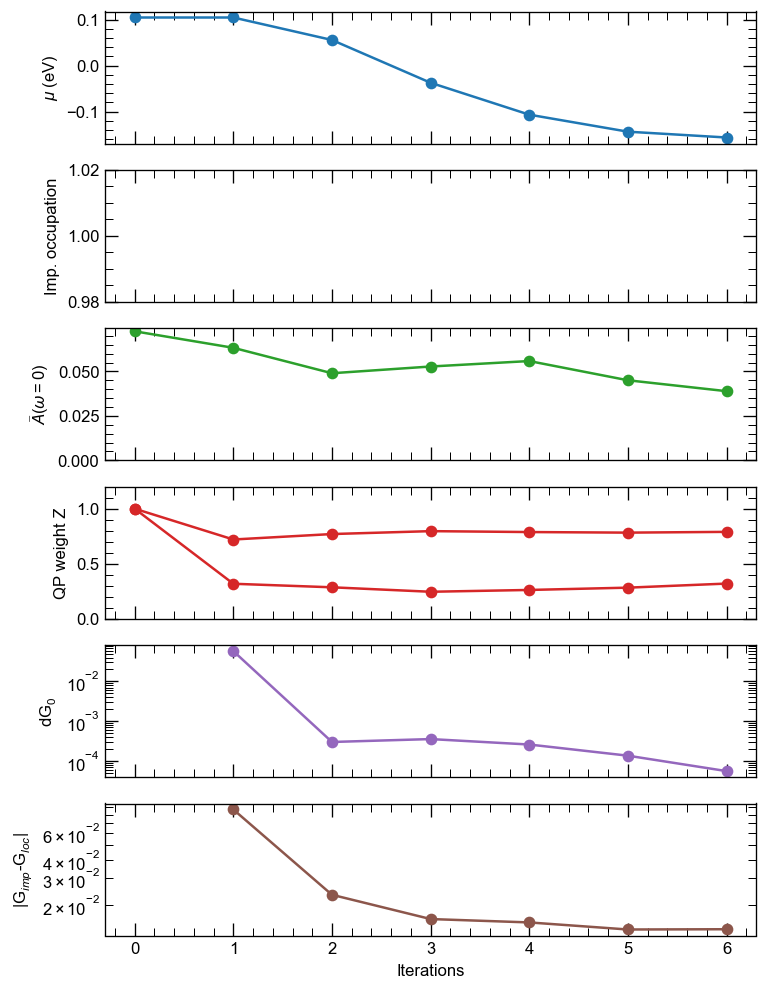

In [4]:
fig, ax = plt.subplots(nrows=6, dpi=120, figsize=(7, 10), sharex=True)

# chemical potential
ax[0].plot(obs["iteration"], obs["mu"], "-o", color="C0")
ax[0].set_ylabel(r"$\mu$ (eV)")

# imp occupation
imp_occ = np.array(obs["imp_occ"][0]["up"]) + np.array(obs["imp_occ"][0]["down"])
ax[1].plot(obs["iteration"], imp_occ, "-o", color="C1")
ax[1].set_ylim(0.98, 1.02)
ax[1].set_ylabel("Imp. occupation")

# A(w=0)
Aw0 = -1 * (np.array(obs["imp_gb2"][0]["up"]) + np.array(obs["imp_gb2"][0]["down"]))
ax[2].plot(obs["iteration"], Aw0, "-o", color="C2")
ax[2].set_ylim(
    0,
)
ax[2].set_ylabel(r"$\bar{A}(\omega=0$)")

# Z
Z = 0.5 * (np.array(obs["orb_Z"][0]["up"]) + np.array(obs["orb_Z"][0]["down"]))
ax[3].plot(obs["iteration"], Z, "-o", color="C3")
ax[3].set_ylim(0, 1.2)
ax[3].set_ylabel(r"QP weight Z")

# convergence of Weiss field
ax[4].semilogy(obs["iteration"][1:], conv_obs["d_G0"][0], "-o", color="C4")
ax[4].set_ylabel(r"dG$_0$")

# convergence of DMFT self-consistency condition Gimp-Gloc
ax[5].semilogy(obs["iteration"][1:], conv_obs["d_Gimp"][0], "-o", color="C5")
ax[5].set_ylabel(r"|G$_{imp}$-G$_{loc}$|")

ax[-1].set_xticks(range(0, len(obs["iteration"])))
ax[-1].set_xlabel("Iterations")

plt.show()